# Description of problems

New testament scholers hypothesize that some books seem like they were inspired by each other due to similarities in language, themes, or styles. For example it is likely that Mark inspired other gospels. My goal is to analyze the King-James-Bible dataset to identify these similarities and patterns. Maybe we can discover new insights about the relationships between different books and verses in the Bible, or at least verify and visualize existing hypotheses.
## Proposed solutions
1. **Word frequency analysis**: Identify the most frequently used words in the Bible to understand common themes and topics.
1. **Book clustering**: Group the books of the Bible based on similarities in language, themes, or styles.
2. **Verse clustering**: Cluster verses that share similar themes or messages.

## Steps to solve the problems
1. **Data Preprocessing**:
   - Load the King-James-Bible dataset.
   - Clean the text by removing punctuation, converting to lowercase, and tokenizing the words.
   - Remove stop words to focus on meaningful words.

2. **Word Frequency Analysis**:
    - Use libraries like NLTK or Counter from the collections module to count word occurrences.
    - Visualize the most common words using bar charts or word clouds.

4. **Book Clustering**:
   - Represent each book using TF-IDF vectors or word embeddings.
    - Apply clustering algorithms like K-Means or Hierarchical Clustering to group similar books.
    - Visualize the clusters using dimensionality reduction techniques like PCA or t-SNE.
5. **Verse Clustering**:
   - Similar to book clustering, represent verses using TF-IDF or embeddings.

# Data description

The King-James-Bible dataset contains the full text of the Bible in the King James Version. Each entry in the dataset includes:
- Book and Verse: The specific book and verse reference (e.g., Genesis 1:1).
- Text: The actual text of the verse.

These entries are divided by tabs. They contrain approximately 31,102 verses from both the Old and New Testaments (which is correct).

In [48]:
import pandas as pd

bible_data = pd.read_csv('..//data//bible-kjv//bible.txt', sep='\t', names=['book + verse', 'text'])

bible_data.head()



,book + verse,text
0,Genesis 1:1,In the beginning God created the heaven and th...
1,Genesis 1:2,"And the earth was without form, and void; and ..."
2,Genesis 1:3,"And God said, Let there be light: and there wa..."
3,Genesis 1:4,"And God saw the light, that it was good: and G..."
4,Genesis 1:5,"And God called the light Day, and the darkness..."


We have no duplicate entries in the dataset. We also have the correct number of verses, in new and old testament.

In [49]:
print("Number of duplicate rows:          ",bible_data.duplicated().sum())
print("Number of rows:                    ", len(bible_data) ," is correct: ", len(bible_data) == 31102)
end_of_old = bible_data[bible_data['book + verse'] == 'Matthew 1:1'].index[0]
print("Number of verses in old testament: ", end_of_old, " is correct: ", end_of_old == 23145)
print("Number of verses in new testament: ", len(bible_data) - end_of_old, "  is correct: ", (len(bible_data) - end_of_old) == 7957)


Number of duplicate rows:           0
Number of rows:                     31102  is correct:  True
Number of verses in old testament:  23145  is correct:  True
Number of verses in new testament:  7957   is correct:  True


# EDA


For our purposes, I would like to split the 'book + verse' column into two separate columns: 'book' and 'verse'. This will allow for easier analysis and referencing of specific books and verses in the Bible. 

## Distribution of verses per book

At first I will look at distribution of verses per book, word counts, and other basic statistics to understand the dataset better.

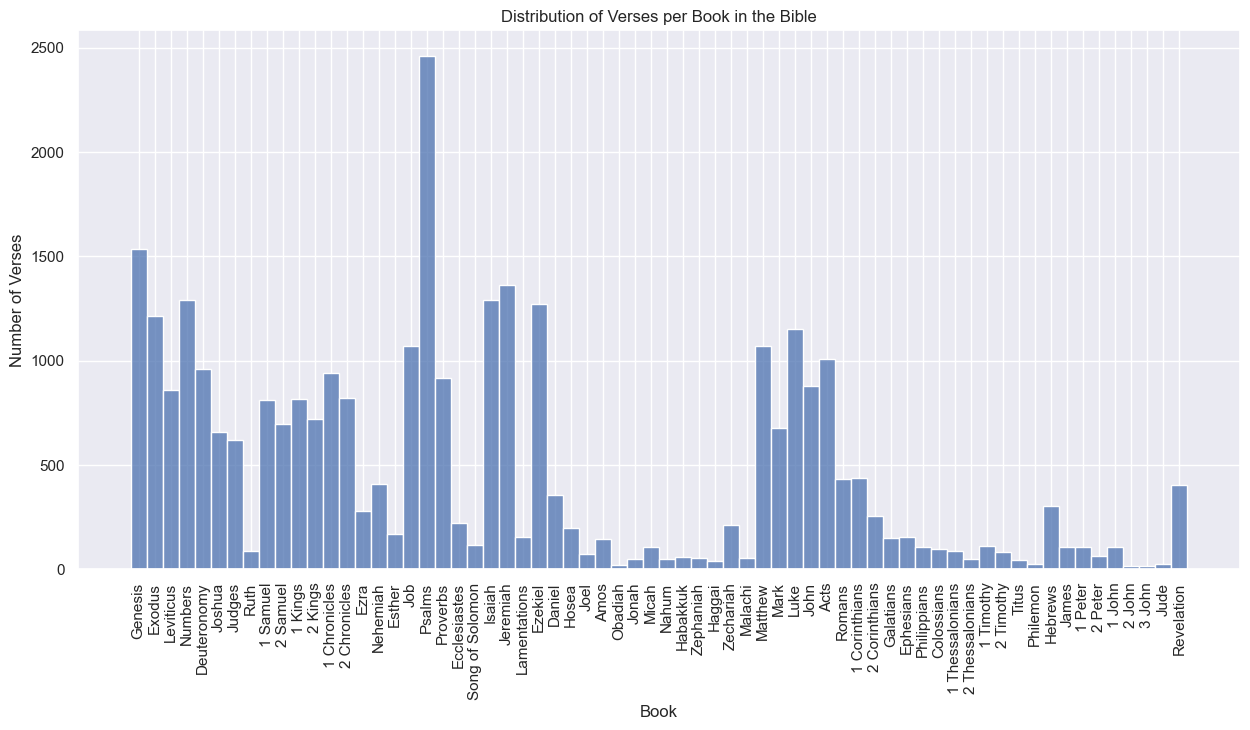

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

bible_data["book"]= bible_data["book + verse"].apply(lambda x: x.split(' ')[0] if len(x.split(' ')) == 2 else ' '.join(x.split(' ')[:-1]))
bible_data["verse"]= bible_data["book + verse"].apply(lambda x: x.split(' ')[1])

plt.figure(figsize=(15, 7))
sns.histplot(data=bible_data, x='book', discrete=True )
plt.xticks(rotation=90)
plt.title('Distribution of Verses per Book in the Bible')
plt.xlabel('Book')
plt.ylabel('Number of Verses')
plt.show()


It seems that some books have significantly more verses than others. For example, Psalms has a high number of verses compared to books like Obadiah or Philemon. This could indicate that certain books are more detailed or cover more topics.

## Distribution of word frequency

I will also analyze the distribution of word frequencies across the entire dataset. For this I will use cloud words and bar charts to visualize the most common words used in the Bible. This analysis will help identify recurring themes and topics throughout the text.

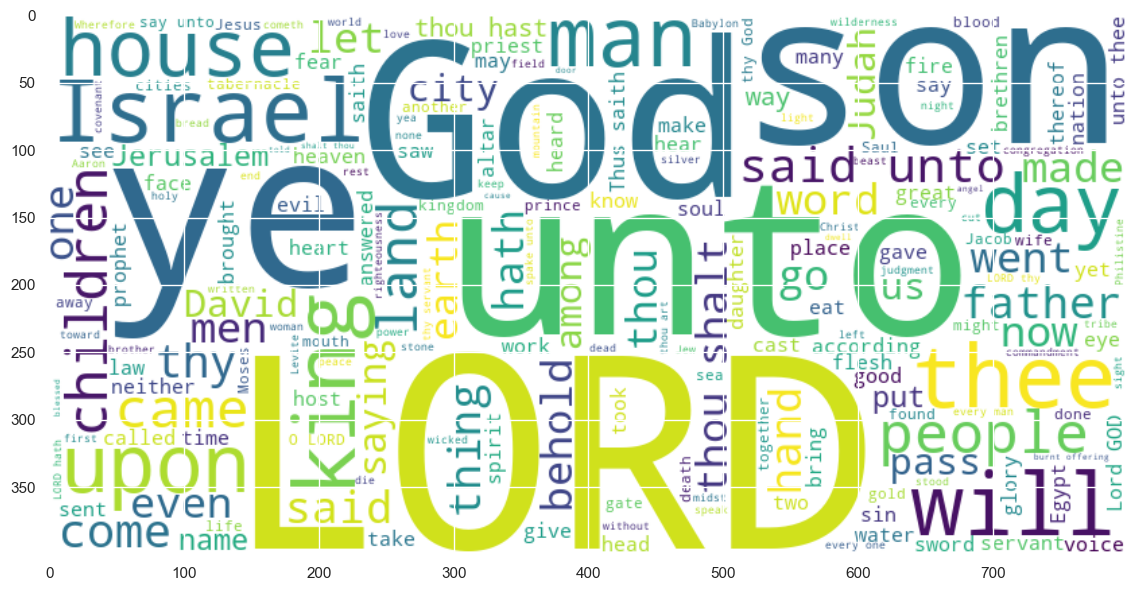

In [51]:
from wordcloud import WordCloud

text = ' '.join(bible_data['text'].tolist())
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
).generate(text)
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
